In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import pandas_profiling as pandas_profiling
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/movies_data.csv')
df.head(10)




,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
#info function gives us the following insights into the df dataframe:
There are a total of 1000 samples (rows) and 12 columns in the dataframe.
There are 7 columns with a numeric datatype and 5 columns with an object datatype.
There are 192 missing values in the data.



In [ ]:
df.describe(include='all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A soldier introduces himself to the Peterson f...,Ridley Scott,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


In [ ]:
df['Revenue (Millions)'].isnull().sum()
df['Metascore'].isnull().sum()

64

In [ ]:
Observations:
There are 128 missing values in Revenue
There are 64 missing values in Metascore
Genre and Actors are a list in the column and should be split

In [ ]:
#Converting Year to Datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Rank                1000 non-null   int64         
 1   Title               1000 non-null   object        
 2   Genre               1000 non-null   object        
 3   Description         1000 non-null   object        
 4   Director            1000 non-null   object        
 5   Actors              1000 non-null   object        
 6   Year                1000 non-null   datetime64[ns]
 7   Runtime (Minutes)   1000 non-null   int64         
 8   Rating              1000 non-null   float64       
 9   Votes               1000 non-null   int64         
 10  Revenue (Millions)  872 non-null    float64       
 11  Metascore           936 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 93.9+ KB


In [ ]:
#Split the actors column into multiple columns
actorsList = df["Actors"].str.split(",", expand = True)
df['Actor0'] = actorsList[0]
df['Actor1'] = actorsList[1]
df['Actor2'] = actorsList[2]
df['Actor3'] = actorsList[3]
#df.drop(labels='Actors',axis=1, inplace=True)
actorsList.head(20)


,0,1,2,3
0,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana
1,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron
2,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula
3,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson
4,Will Smith,Jared Leto,Margot Robbie,Viola Davis
5,Matt Damon,Tian Jing,Willem Dafoe,Andy Lau
6,Ryan Gosling,Emma Stone,Rosemarie DeWitt,J.K. Simmons
7,Essie Davis,Andrea Riseborough,Julian Barratt,Kenneth Branagh
8,Charlie Hunnam,Robert Pattinson,Sienna Miller,Tom Holland
9,Jennifer Lawrence,Chris Pratt,Michael Sheen,Laurence Fishburne


In [ ]:
df.head(20)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actor0,Actor1,Actor2,Actor3
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014-01-01,121,8.1,757074,333.13,76.0,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012-01-01,124,7.0,485820,126.46,65.0,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016-01-01,117,7.3,157606,138.12,62.0,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016-01-01,108,7.2,60545,270.32,59.0,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016-01-01,123,6.2,393727,325.02,40.0,Will Smith,Jared Leto,Margot Robbie,Viola Davis
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016-01-01,103,6.1,56036,45.13,42.0,Matt Damon,Tian Jing,Willem Dafoe,Andy Lau
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016-01-01,128,8.3,258682,151.06,93.0,Ryan Gosling,Emma Stone,Rosemarie DeWitt,J.K. Simmons
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016-01-01,89,6.4,2490,NaN,71.0,Essie Davis,Andrea Riseborough,Julian Barratt,Kenneth Branagh
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016-01-01,141,7.1,7188,8.01,78.0,Charlie Hunnam,Robert Pattinson,Sienna Miller,Tom Holland
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016-01-01,116,7.0,192177,100.01,41.0,Jennifer Lawrence,Chris Pratt,Michael Sheen,Laurence Fishburne


In [ ]:
#As there is not much difference between the median and the mean.So using mean to replace missing values 
mean_metascore = df.Metascore.mean()
print(mean_metascore)

print('Before fillna - ', df['Metascore'].isnull().sum())
df.Metascore.fillna(mean_metascore, inplace=True)
print('After fillna - ', df['Metascore'].isnull().sum())

58.98504273504273
Before fillna -  64
After fillna -  0


In [ ]:
df.describe(include = 'all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actor0,Actor1,Actor2,Actor3
count,1000.000000,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,872.000000,1000.000000,1000,1000,1000,999
unique,NaN,999,207,1000,644,996,11,NaN,NaN,NaN,NaN,NaN,525,692,788,897
top,NaN,The Host,"Action,Adventure,Sci-Fi",A soldier introduces himself to the Peterson f...,Ridley Scott,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...",2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,Christian Bale,Cate Blanchett,Morgan Freeman,Woody Harrelson
freq,NaN,2,50,1,8,2,297,NaN,NaN,NaN,NaN,NaN,11,8,6,5
first,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,NaN,113.172000,6.723200,1.698083e+05,82.956376,58.985043,NaN,NaN,NaN,NaN
std,288.819436,NaN,NaN,NaN,NaN,NaN,NaN,18.810908,0.945429,1.887626e+05,103.253540,16.634858,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,1.900000,6.100000e+01,0.000000,11.000000,NaN,NaN,NaN,NaN
25%,250.750000,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,6.200000,3.630900e+04,13.270000,47.750000,NaN,NaN,NaN,NaN


In [ ]:
#As it is categorical column we are replacing missing values with mode of that column.
df['Actor3'].isnull().sum()
mode_actor3 = df.Actor3.mode()
print(mode_actor3)

df['Actor3'] = df['Actor3'].fillna(df['Actor3'].mode()[0])

df.describe(include='all')

0     Woody Harrelson
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actor0,Actor1,Actor2,Actor3
count,1000.000000,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,872.000000,1000.000000,1000,1000,1000,1000
unique,NaN,999,207,1000,644,996,11,NaN,NaN,NaN,NaN,NaN,525,692,788,897
top,NaN,The Host,"Action,Adventure,Sci-Fi",A soldier introduces himself to the Peterson f...,Ridley Scott,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...",2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,Christian Bale,Cate Blanchett,Morgan Freeman,Woody Harrelson
freq,NaN,2,50,1,8,2,297,NaN,NaN,NaN,NaN,NaN,11,8,6,6
first,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,NaN,113.172000,6.723200,1.698083e+05,82.956376,58.985043,NaN,NaN,NaN,NaN
std,288.819436,NaN,NaN,NaN,NaN,NaN,NaN,18.810908,0.945429,1.887626e+05,103.253540,16.634858,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,1.900000,6.100000e+01,0.000000,11.000000,NaN,NaN,NaN,NaN
25%,250.750000,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,6.200000,3.630900e+04,13.270000,47.750000,NaN,NaN,NaN,NaN


In [ ]:
#Split the genre column into multiple columns
genreList = df["Genre"].str.split(",", expand = True)
df['Genre0'] = genreList[0]
df['Genre1'] = genreList[1]
df['Genre2'] = genreList[2]

df.drop(labels='Genre',axis=1, inplace=True)
genreList.head(10)


,0,1,2
0,Action,Adventure,Sci-Fi
1,Adventure,Mystery,Sci-Fi
2,Horror,Thriller,None
3,Animation,Comedy,Family
4,Action,Adventure,Fantasy
5,Action,Adventure,Fantasy
6,Comedy,Drama,Music
7,Comedy,None,None
8,Action,Adventure,Biography
9,Adventure,Drama,Romance


In [ ]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Rank,Title,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actor0,Actor1,Actor2,Actor3,Genre0,Genre1,Genre2
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,872.000000,1000.000000,1000,1000,1000,1000,1000,895,660
unique,NaN,999,1000,644,996,11,NaN,NaN,NaN,NaN,NaN,525,692,788,897,13,19,18
top,NaN,The Host,A soldier introduces himself to the Peterson f...,Ridley Scott,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...",2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,Christian Bale,Cate Blanchett,Morgan Freeman,Woody Harrelson,Action,Drama,Thriller
freq,NaN,2,1,8,2,297,NaN,NaN,NaN,NaN,NaN,11,8,6,6,293,238,133
first,NaN,NaN,NaN,NaN,NaN,2006-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,113.172000,6.723200,1.698083e+05,82.956376,58.985043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,288.819436,NaN,NaN,NaN,NaN,NaN,18.810908,0.945429,1.887626e+05,103.253540,16.634858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,66.000000,1.900000,6.100000e+01,0.000000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,250.750000,NaN,NaN,NaN,NaN,NaN,100.000000,6.200000,3.630900e+04,13.270000,47.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#As it is categorical column we are replacing missing values with mode of that column.
df['Genre1'].isnull().sum()
mode_genre1 = df.Genre1.mode()
print(mode_genre1)
df['Genre1'] = df['Genre1'].fillna(df['Genre1'].mode()[0])

df['Genre2'].isnull().sum()
mode_genre2 = df.Genre2.mode()
print(mode_genre2)
df['Genre2'] = df['Genre2'].fillna(df['Genre2'].mode()[0])

df.describe(include= 'all')

0    Drama
dtype: object
0    Thriller
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  if sys.path[0] == '':


,Rank,Title,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actor0,Actor1,Actor2,Actor3,Genre0,Genre1,Genre2
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,872.000000,1000.000000,1000,1000,1000,1000,1000,1000,1000
unique,NaN,999,1000,644,996,11,NaN,NaN,NaN,NaN,NaN,525,692,788,897,13,19,18
top,NaN,The Host,A soldier introduces himself to the Peterson f...,Ridley Scott,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...",2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,Christian Bale,Cate Blanchett,Morgan Freeman,Woody Harrelson,Action,Drama,Thriller
freq,NaN,2,1,8,2,297,NaN,NaN,NaN,NaN,NaN,11,8,6,6,293,343,473
first,NaN,NaN,NaN,NaN,NaN,2006-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,113.172000,6.723200,1.698083e+05,82.956376,58.985043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,288.819436,NaN,NaN,NaN,NaN,NaN,18.810908,0.945429,1.887626e+05,103.253540,16.634858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,66.000000,1.900000,6.100000e+01,0.000000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,250.750000,NaN,NaN,NaN,NaN,NaN,100.000000,6.200000,3.630900e+04,13.270000,47.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
!pip install chart-studio

     |████████████████████████████████| 71kB 3.1MB/s 


In [ ]:
!pip install plotly --upgrade


     |████████████████████████████████| 20.6MB 1.9MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


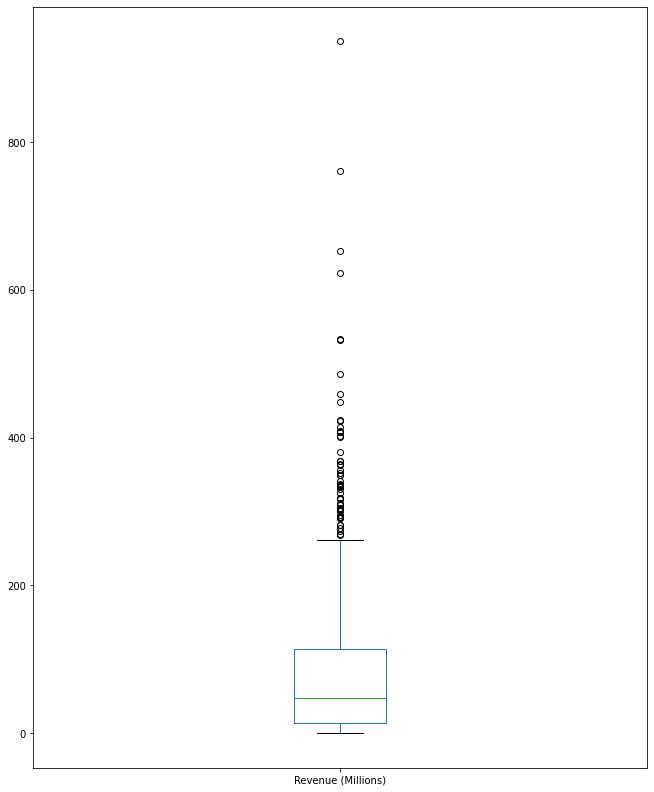

In [ ]:
df['Revenue (Millions)'].plot(kind='box', fontsize=10, figsize=(11,14), legend=True)

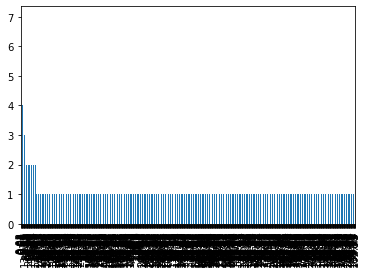

In [ ]:
df['Revenue (Millions)'].value_counts().plot(kind='bar')

In [ ]:
#Rename the columns to an easier name
df.rename(columns={'Runtime (Minutes)': 'Runtime', 'Revenue (Millions)':'Revenue'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Rank         1000 non-null   int64         
 1   Title        1000 non-null   object        
 2   Description  1000 non-null   object        
 3   Director     1000 non-null   object        
 4   Actors       1000 non-null   object        
 5   Year         1000 non-null   datetime64[ns]
 6   Runtime      1000 non-null   int64         
 7   Rating       1000 non-null   float64       
 8   Votes        1000 non-null   int64         
 9   Revenue      872 non-null    float64       
 10  Metascore    1000 non-null   float64       
 11  Actor0       1000 non-null   object        
 12  Actor1       1000 non-null   object        
 13  Actor2       1000 non-null   object        
 14  Actor3       1000 non-null   object        
 15  Genre0       1000 non-null   object        
 16  Genre1 

82.95637614678897
47.985


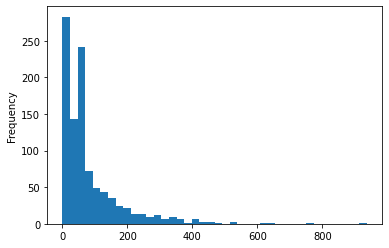

In [ ]:
median_revenue = df.Revenue.median()
mean_revenue = df.Revenue.mean()
print(mean_revenue)
print(median_revenue)

df.Revenue.fillna(median_revenue, inplace=False).plot.hist(bins=40)

Before fillna -  128
After fillna -  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Rank,Title,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Actor0,Actor1,Actor2,Actor3,Genre0,Genre1,Genre2
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000,1000,1000,1000,1000,1000,1000
unique,NaN,999,1000,644,996,11,NaN,NaN,NaN,NaN,NaN,525,692,788,897,13,19,18
top,NaN,The Host,A soldier introduces himself to the Peterson f...,Ridley Scott,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...",2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,Christian Bale,Cate Blanchett,Morgan Freeman,Woody Harrelson,Action,Drama,Thriller
freq,NaN,2,1,8,2,297,NaN,NaN,NaN,NaN,NaN,11,8,6,6,293,343,473
first,NaN,NaN,NaN,NaN,NaN,2006-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,113.172000,6.723200,1.698083e+05,78.480040,58.985043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,288.819436,NaN,NaN,NaN,NaN,NaN,18.810908,0.945429,1.887626e+05,97.118097,16.634858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,66.000000,1.900000,6.100000e+01,0.000000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,250.750000,NaN,NaN,NaN,NaN,NaN,100.000000,6.200000,3.630900e+04,17.442500,47.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


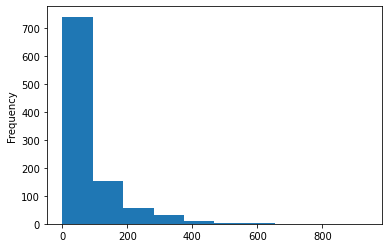

In [ ]:
#The distribution seems to be right skewed/positively skewed with the mean much greater than the median. I am distributing the data randomly between the mean and the median
import random
print('Before fillna - ', df['Revenue'].isnull().sum())
df.Revenue.fillna(median_revenue, inplace=True)
df.Revenue.fillna(random.randint(int(median_revenue), int(mean_revenue)), inplace=False).plot.hist()
print('After fillna - ', df['Revenue'].isnull().sum())

df.describe(include = 'all')

[Text(0, 0, 'Comedy'),
 Text(0, 0, 'Horror'),
 Text(0, 0, 'Action'),
 Text(0, 0, 'Fantasy'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Drama'),
 Text(0, 0, 'Sci-Fi'),
 Text(0, 0, 'Mystery'),
 Text(0, 0, 'Thriller'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Biography'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Romance')]

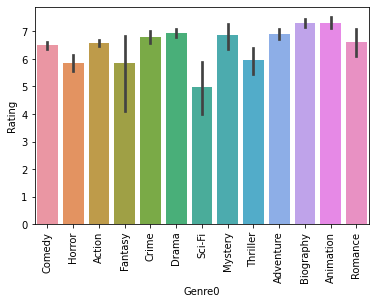

In [ ]:
#Which genres gets the highest Rating 
import seaborn as sns
df1 = df.sort_values(['Rating'])
barplot = sns.barplot(x='Genre0', y='Rating', data = df1)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)


Text(0, 0.5, 'Metascore')

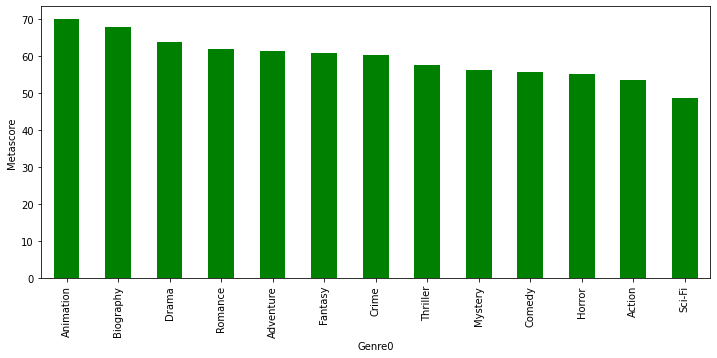

In [ ]:
#which genre gets the highest critic scores
#df.sort_values(['Metascore'])
plt.figure(figsize = (12, 5))
df.groupby('Genre0')['Metascore'].mean().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Metascore')


Text(0, 0.5, 'Metascore')

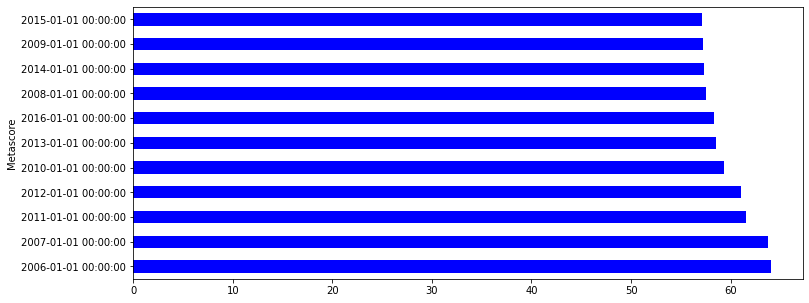

In [ ]:
#Find out average critic score for every year

plt.figure(figsize = (12, 5))
df.groupby('Year')['Metascore'].mean().sort_values(ascending=False).plot(kind='barh', color = 'b')
plt.ylabel('Metascore')


In [ ]:
gen_rat = pd.Series(df['Rating']).unique()
print(gen_rat)

[8.1 7.  7.3 7.2 6.2 6.1 8.3 6.4 7.1 7.5 7.8 7.9 7.7 6.6 8.2 6.7 8.  6.5
 5.3 6.8 4.7 5.9 6.3 5.6 8.6 7.6 6.9 2.7 3.7 5.8 9.  7.4 4.1 8.5 8.8 5.4
 6.  5.7 8.4 5.2 5.5 4.8 3.9 4.9 5.1 5.  4.3 4.6 4.2 4.  3.2 4.5 1.9 3.5
 4.4]


In [ ]:
df['Rating'].nunique()

55

[Text(0, 0, '2006-01-01T00:00:00.000000000'),
 Text(0, 0, '2007-01-01T00:00:00.000000000'),
 Text(0, 0, '2008-01-01T00:00:00.000000000'),
 Text(0, 0, '2009-01-01T00:00:00.000000000'),
 Text(0, 0, '2010-01-01T00:00:00.000000000'),
 Text(0, 0, '2011-01-01T00:00:00.000000000'),
 Text(0, 0, '2012-01-01T00:00:00.000000000'),
 Text(0, 0, '2013-01-01T00:00:00.000000000'),
 Text(0, 0, '2014-01-01T00:00:00.000000000'),
 Text(0, 0, '2015-01-01T00:00:00.000000000'),
 Text(0, 0, '2016-01-01T00:00:00.000000000')]

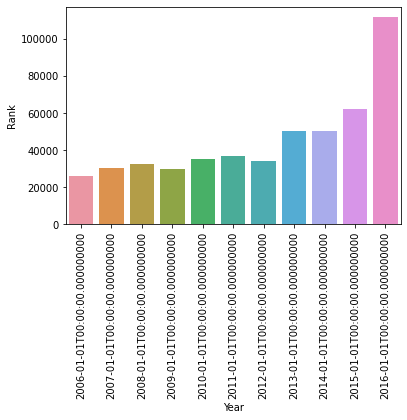

In [ ]:
#Number of movies distribution over the years.

df.groupby(['Year'], as_index=True).count()
barplot = sns.barplot(x='Year', y='Rank', data= df.groupby(['Year'], as_index=False).sum())
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
#df.head()

[Text(0, 0, '2006-01-01T00:00:00.000000000'),
 Text(0, 0, '2007-01-01T00:00:00.000000000'),
 Text(0, 0, '2008-01-01T00:00:00.000000000'),
 Text(0, 0, '2009-01-01T00:00:00.000000000'),
 Text(0, 0, '2010-01-01T00:00:00.000000000'),
 Text(0, 0, '2011-01-01T00:00:00.000000000'),
 Text(0, 0, '2012-01-01T00:00:00.000000000'),
 Text(0, 0, '2013-01-01T00:00:00.000000000'),
 Text(0, 0, '2014-01-01T00:00:00.000000000'),
 Text(0, 0, '2015-01-01T00:00:00.000000000'),
 Text(0, 0, '2016-01-01T00:00:00.000000000')]

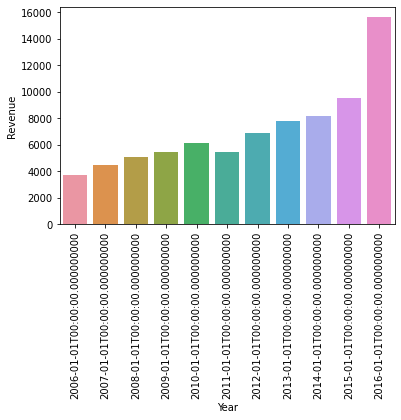

In [ ]:
#Have Revenue become better or worse with the years? 
barplot = sns.barplot(x='Year', y='Revenue', data=df.groupby(['Year'], as_index=False).sum())
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Adventure'),
 Text(0, 0, 'Mystery'),
 Text(0, 0, 'Thriller'),
 Text(0, 0, 'Comedy'),
 Text(0, 0, 'Drama'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'Horror'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Romance'),
 Text(0, 0, 'History'),
 Text(0, 0, 'Fantasy'),
 Text(0, 0, 'Sci-Fi'),
 Text(0, 0, 'Biography'),
 Text(0, 0, 'Music'),
 Text(0, 0, 'Western'),
 Text(0, 0, 'War'),
 Text(0, 0, 'Musical'),
 Text(0, 0, 'Sport'),
 Text(0, 0, 'Action')]

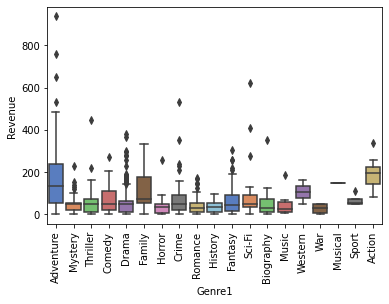

In [ ]:
#which Genre generates highest revenue.

#df.groupby(['Genre0','Genre1', 'Genre2'])['Revenue'].count()
#barplot = sns.barplot(x="Genre1", y="Revenue",data=df, palette="muted")
#barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)

df.groupby(['Genre0','Genre1', 'Genre2'])['Revenue'].count()
boxplot = sns.boxplot(x="Genre1", y="Revenue",data=df, palette="muted")
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90)

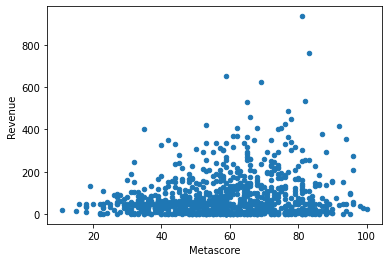

In [ ]:
#Find out the correlation between critics score and revenue

#sns.barplot(x="Metascore", y="Revenue", data=df.sort_values('Revenue', ascending=False).head(50))
df.plot.scatter(x='Metascore', y = 'Revenue')

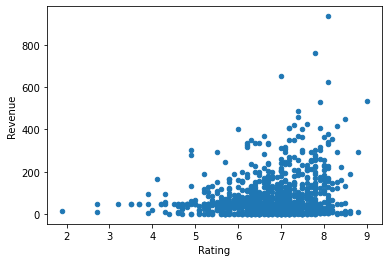

In [ ]:
#Find out the correlation between Rating and revenue

df.plot.scatter(x='Rating', y = 'Revenue')

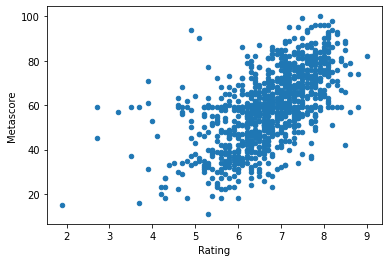

In [ ]:
#Find out the correlation between Rating and Metascore

df.plot.scatter(x='Rating', y = 'Metascore')

In [ ]:
#get the actors of the top 100 movies in a Series
actors = (df.sort_values(['Revenue'], ascending=False).head(50))['Actors']

actorsList = actors.tolist()
len(actorsList)

actorsFullList = []

for actors in actorsList:
    actorsList = actors.split(sep=',')
    for actor in actorsList:
        actorsFullList.append(actor.strip())

len(actorsFullList)

actors = pd.Series(actorsFullList)
actors.value_counts()

Robert Downey Jr.     6
Shia LaBeouf          4
Liam Hemsworth        4
Daniel Radcliffe      4
Josh Hutcherson       4
                     ..
Kristen Bell          1
Tom Hardy             1
Mark Ruffalo          1
Cole Konis            1
Michelle Rodriguez    1
Length: 145, dtype: int64